# Imports

In [18]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Pandas

Think of pandas as just a really nice convenience to get your labelled data into an n dimensional array without
any additional numpy overhead. Consider the numpy way:

In [41]:
f = 'iris.data'
f = open(f, 'r')
f = f.readlines()
for i in range(len(f)):
    f[i] = f[i].strip('\n')

isample_dtype = np.dtype([('id', np.uint8),])

features = []
for feature in f[0].split(','):
    features.append(feature)
    
dtypes = [('id', np.uint8)]
for feature in features:
    if feature == 'species':
        dtypes.append((feature, 'U10'))
    else:
        dtypes.append((feature, np.float64))
        
isample_dtype = np.dtype(dtypes)

samples = []
for l in range(1, len(f)):
    f[l] = f[l].strip('\n')
    s = f[l].split(',')
    s = (l, float(s[0]), float(s[1]), float(s[2]), float(s[3]), s[4])
    s = np.array([s], dtype=isample_dtype)
    samples.append(s)
    
samples = np.array(samples)



print(samples)

[[(  1, 5.1, 3.5, 1.4, 0.2, 'setosa')]
 [(  2, 4.9, 3. , 1.4, 0.2, 'setosa')]
 [(  3, 4.7, 3.2, 1.3, 0.2, 'setosa')]
 [(  4, 4.6, 3.1, 1.5, 0.2, 'setosa')]
 [(  5, 5. , 3.6, 1.4, 0.2, 'setosa')]
 [(  6, 5.4, 3.9, 1.7, 0.4, 'setosa')]
 [(  7, 4.6, 3.4, 1.4, 0.3, 'setosa')]
 [(  8, 5. , 3.4, 1.5, 0.2, 'setosa')]
 [(  9, 4.4, 2.9, 1.4, 0.2, 'setosa')]
 [( 10, 4.9, 3.1, 1.5, 0.1, 'setosa')]
 [( 11, 5.4, 3.7, 1.5, 0.2, 'setosa')]
 [( 12, 4.8, 3.4, 1.6, 0.2, 'setosa')]
 [( 13, 4.8, 3. , 1.4, 0.1, 'setosa')]
 [( 14, 4.3, 3. , 1.1, 0.1, 'setosa')]
 [( 15, 5.8, 4. , 1.2, 0.2, 'setosa')]
 [( 16, 5.7, 4.4, 1.5, 0.4, 'setosa')]
 [( 17, 5.4, 3.9, 1.3, 0.4, 'setosa')]
 [( 18, 5.1, 3.5, 1.4, 0.3, 'setosa')]
 [( 19, 5.7, 3.8, 1.7, 0.3, 'setosa')]
 [( 20, 5.1, 3.8, 1.5, 0.3, 'setosa')]
 [( 21, 5.4, 3.4, 1.7, 0.2, 'setosa')]
 [( 22, 5.1, 3.7, 1.5, 0.4, 'setosa')]
 [( 23, 4.6, 3.6, 1. , 0.2, 'setosa')]
 [( 24, 5.1, 3.3, 1.7, 0.5, 'setosa')]
 [( 25, 4.8, 3.4, 1.9, 0.2, 'setosa')]
 [( 26, 5. , 3. , 1.6, 0.

There is nothing wrong with this, but it's just more boilerplate over head in our workflow that we don't need. Plus it requires us to know the types of every single part of each data sample, which we may not. Finally, printing it is just ugly. Now look at what pandas does: 

In [42]:
raw_iris = pd.read_csv('iris.data')

In [43]:
pd.DataFrame.from_records(raw_iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Cleaner, simpler, no gotchas. Use pandas. 

In [47]:
iris_df = pd.DataFrame.from_records(raw_iris)

# Seaborn

Just as pandas was numpy for labelled data of arbitrary types, seaborn is matplotlib for labelled data types.
Instead of having to worry about the overhead associated with generating vectors for individual features, then
generating a grid of subplots, and iterating through both while making sure all datatypes match, we can just
punt everything to seaborn. 

Seaborn makes plotting labelled data and statistics sexy. Use seaborn. 

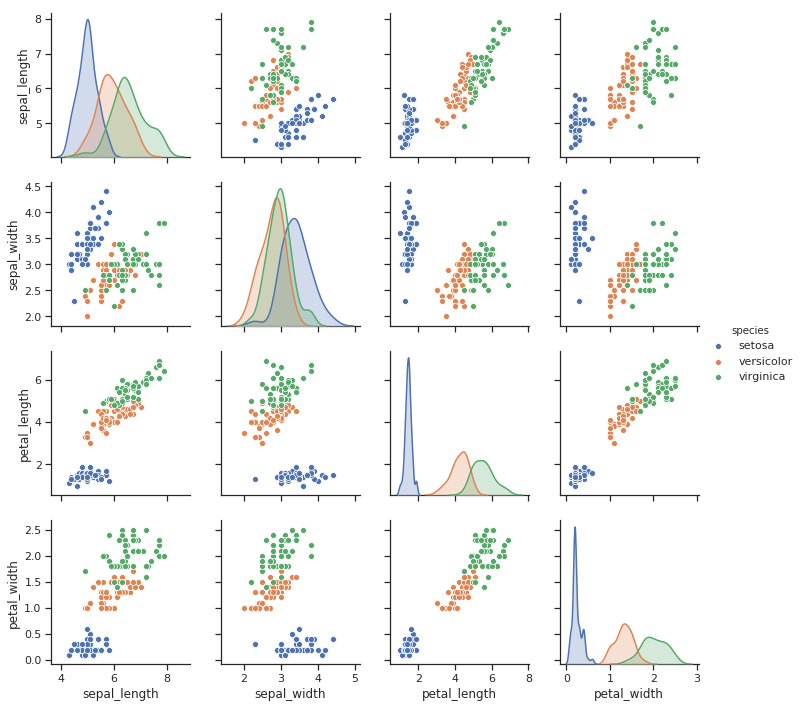

In [49]:
sns.set(style="ticks")

sns.pairplot(iris_df, hue="species")

If we wanted a more compact value, we could do this:

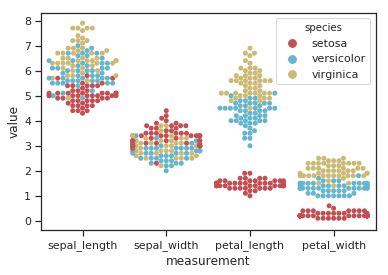

In [50]:
iris_melt = pd.melt(iris_df, "species", var_name='measurement')
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species",
              palette=["r", "c", "y"], data=iris_melt)

Seaborn gives us a way to see the raw input distributions before classification training:

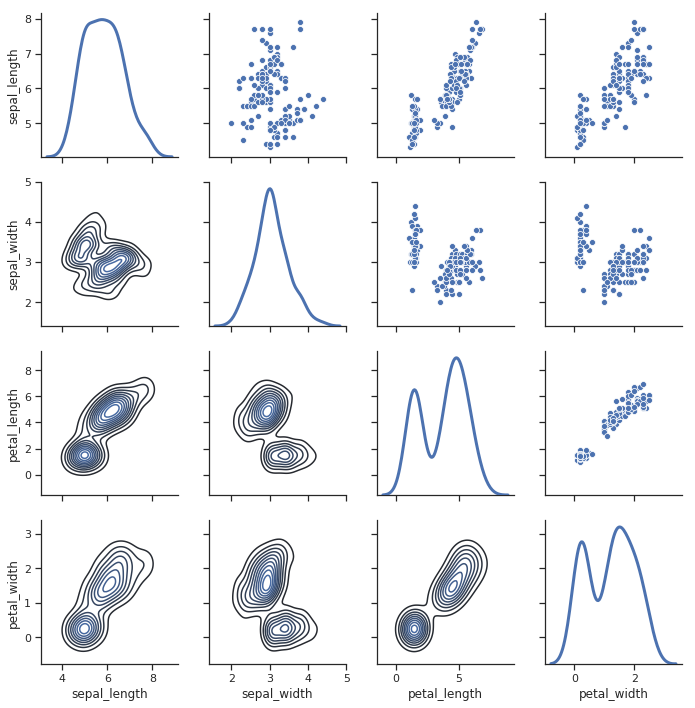

In [51]:
g = sns.PairGrid(iris_df, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)

# Scikit-Learn

Nobody wants to code a perceptron everytime they need it. Nobody wants to code anything really; Scikit-Learn lets us continue honoring this traditional cs stance for a variety of ML pipeline components:  
![title](Pic1.png)

We will look at each of these components in more detail as we go, but to get a feel for how Sci

## Logistic Regression

## Support Vector Machine